In [142]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import datetime

%matplotlib inline

In [143]:
#Read csv file
data = pd.read_csv("data.csv")

In [144]:
#See what's inside
data

,DATE,index,RP_ENTITY_ID,GLOBAL_ALL,GLOBAL_HEAD,GLOBAL_BODY,GLOBAL_ALL_SG90,GLOBAL_HEAD_SG90,GLOBAL_BODY_SG90,GLOBAL_ALL_SG365,...,GROUP_E_BODY,GROUP_E_ALL_SG90,GROUP_E_HEAD_SG90,GROUP_E_BODY_SG90,GROUP_E_ALL_SG365,GROUP_E_HEAD_SG365,GROUP_E_BODY_SG365,GROUP_AM_BODY,T0_RETURN,T1_RETURN
0,2005-01-03,0,0157B1,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,...,0.610000,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,0.018520,-0.037526
1,2005-01-03,1,046263,0.010000,0.010000,NaN,0.010000,0.010000,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001415,0.007740
2,2005-01-03,2,07CA6A,0.633333,0.633333,NaN,0.660000,0.660000,NaN,0.700000,...,NaN,0.700000,0.700000,NaN,0.700000,0.700000,NaN,NaN,-0.005460,0.008110
3,2005-01-03,3,0BC29E,0.550000,NaN,0.550000,0.550000,NaN,0.550000,0.550000,...,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,0.550000,0.018809,0.019265
4,2005-01-03,4,0BC6D8,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002185,0.008238
5,2005-01-03,5,0BE0AE,0.620000,0.620000,NaN,0.620000,0.620000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,0.002435
6,2005-01-03,6,0D920D,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002242,0.006588
7,2005-01-03,7,1921DD,0.532000,0.532000,NaN,0.500000,0.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015793,0.003908
8,2005-01-03,8,1A3E1B,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005717,0.017611
9,2005-01-03,9,1FCC00,-0.740000,-0.740000,NaN,-0.740000,-0.740000,NaN,NaN,...,NaN,-0.740000,-0.740000,NaN,NaN,NaN,NaN,NaN,-0.017175,-0.020631


In [145]:
Id='619882'#619882 very populated, 50070E also very populated, D25249 not much populated, 5D0EAE two points..
#set date as index
data.index
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')

In [147]:
subdata = data[data.RP_ENTITY_ID==Id]
date_start = '2013-01-01'
date_split   = '2016-01-01'
date_end   = '2017-02-17'
train = subdata[date_start:date_end]#ARIMA takes the full data
trainplot = subdata[date_start:date_split]#ARIMA takes the full data
test = subdata[date_split:date_end]

In [148]:
serie_to_predict = train[train.RP_ENTITY_ID==Id].T1_RETURN
serie_to_test = test[test.RP_ENTITY_ID==Id].T1_RETURN

In [149]:
serie_to_predict = serie_to_predict.replace(np.nan, 0).astype(float)
serie_to_test = serie_to_test.replace(np.nan, 0).astype(float)

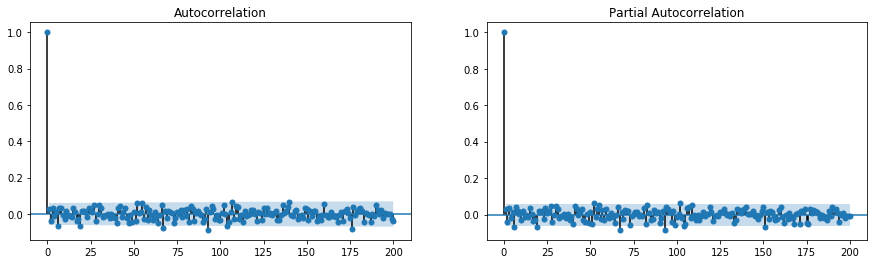

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf (serie_to_predict, lags=200, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(serie_to_predict, lags=200, ax=axes[1])

In [151]:
models = {
    #'model_1'  : sm.tsa.ARIMA(serie_to_predict, order=(1, 1, 1)),
    #'model_2' : sm.tsa.ARIMA(serie_to_predict, order=(2, 1, 1)),
    #'model_3' : sm.tsa.ARIMA(serie_to_predict, order=(3, 1, 1)),
    'ARIMA' : sm.tsa.ARIMA(serie_to_predict, order=(2, 1, 2)),
    #'model_5' : sm.tsa.ARIMA(serie_to_predict, order=(2, 0, 2)),
    #'model_6' : sm.tsa.ARIMA(serie_to_predict, order=(1, 2, 3))
}

models_res = {}
for i,c in models.items():
    print "fitting : ", i
    models_res[i] = c.fit()

fitting :  ARIMA


In [152]:
def prediction_plot(model_res, y, at_time = '2017-01-01', title='', h=85):
    pred = model_res.predict(start=y.index[-h])#ARIMA

    # Graph
    fig, ax = plt.subplots(figsize=(15,3))
    plt.title(title)

    # Plot data points
    y[at_time:].plot(label='Current', color='blue')
    pred.plot(color='red', label='Prediction (ARIMA)')
    ax.legend(loc='upper right')
    ax.set_ylabel('T1 return')

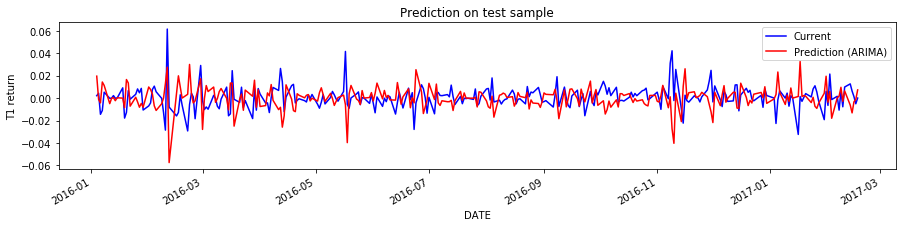

In [153]:
prediction_plot(models_res['ARIMA'], 
                serie_to_predict, at_time = '2016-01-01', h=290, 
                title = 'Prediction on test sample')

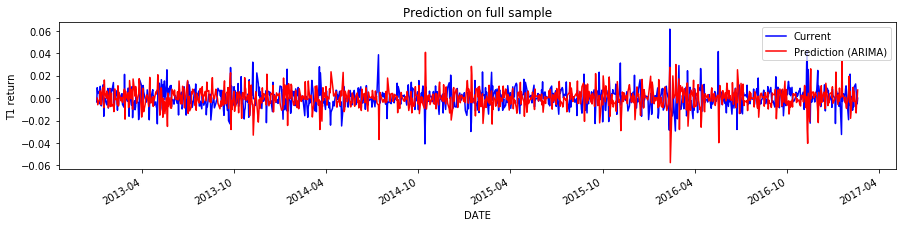

In [157]:
prediction_plot(models_res['ARIMA'], 
                serie_to_predict, at_time = '2013-01-01', h=-1, 
                title = 'Prediction on full sample')

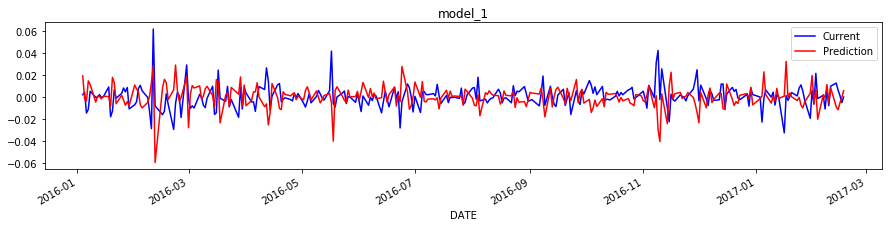

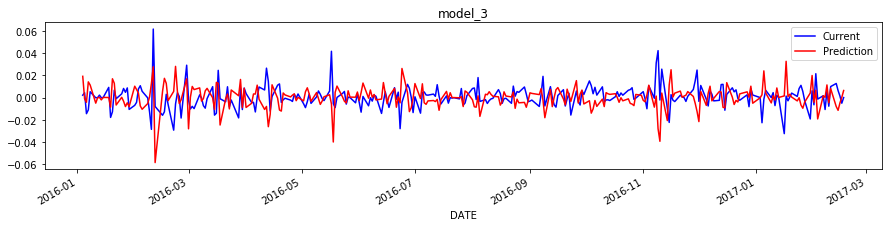

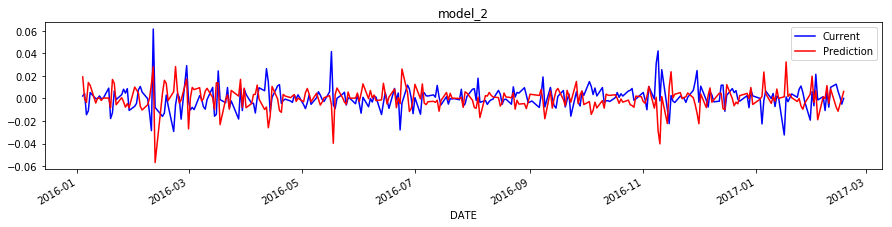

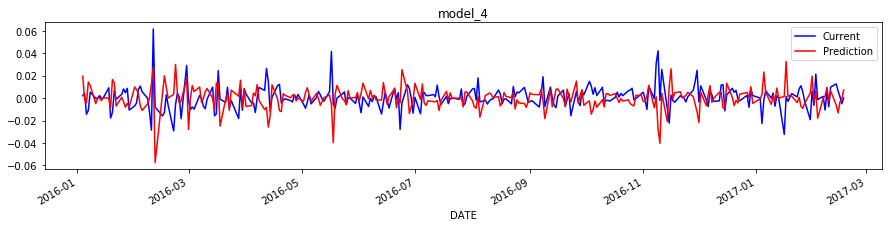

In [77]:
for i,c in models_res.items():
    prediction_plot(c, serie_to_predict, at_time = '2016-01-01', h=290, title = i)

## Prediction file

In [134]:
prediction_test = models_res['model_4'].predict(start=serie_to_test.index[0]).to_frame()
prediction_test = serie_to_test.to_frame().join(prediction_test)
prediction_test.columns = ['T1_RETURN', 'T1_PREDICT']
prediction_test

train = subdata[date_start:date_split]
serie_to_predict = train[train.RP_ENTITY_ID==Id].T1_RETURN
prediction_train = models_res['model_4'].predict(start=serie_to_predict.index[1]).to_frame()
prediction_train = serie_to_predict.to_frame().join(prediction_train)
prediction_train.columns = ['T1_RETURN', 'T1_PREDICT']
prediction_train

,T1_RETURN,T1_PREDICT
DATE,,
2013-01-02,-0.003399,NaN
2013-01-03,0.009365,9.578315e-07
2013-01-04,0.004215,-5.889293e-03
2013-01-07,0.006196,-1.538525e-03
2013-01-08,-0.005093,-1.547434e-03
2013-01-09,0.010587,6.464289e-03
2013-01-10,-0.000641,-5.808014e-03
2013-01-11,-0.006900,2.260169e-03
2013-01-14,0.005111,9.521475e-03


In [135]:
prediction_test.to_csv( './results/testARIMA.csv')
prediction_train.to_csv( './results/trainARIMA.csv')